In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'DataSet/carDataSet.txt')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Text(0, 0.5, 'Age(yrs)')

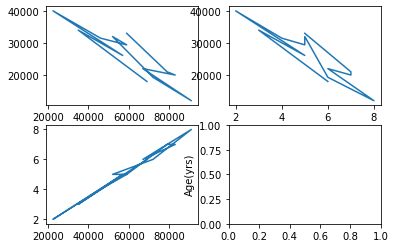

In [3]:
fig , axis = plt.subplots(2,2)

axis[0,0].plot(data.Mileage,data['Sell Price($)'])

axis[1,0].plot(data.Mileage,data['Age(yrs)'])
axis[0,1].plot(data['Age(yrs)'],data['Sell Price($)'])
plt.ylabel('Age(yrs)')

In [4]:
dummies = pd.get_dummies(data['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
dummies = dummies.drop(['Audi A5'],axis=1)
# data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
final_data = pd.concat([data,dummies],axis='columns')
final_data

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [7]:
# NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going 
# to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are 
# using is not handling this for you
# final_data.drop(['Sell Price($)'])

In [13]:
x_ = final_data.iloc[:,1:]    # Dropped Column one (Car Model)
x_ = x_.drop(['Sell Price($)'],axis='columns')
x_

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [21]:
y_ = final_data['Sell Price($)']
y_

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(x_,y_)

LinearRegression()

In [24]:
x_.columns

Index(['Mileage', 'Age(yrs)', 'BMW X5', 'Mercedez Benz C class'], dtype='object')

In [25]:
# Predicting milage - 50000, age = 4, Audi A5 Car Price

model.predict([[50000,4,0,0]])

array([32687.16600141])

In [26]:
# 69000	6	1	0
model.predict([[69000,6,1,0]])

array([18705.2723644])

In [27]:
# 72000	6	0	0

model.predict([[72000,6,0,0]])

array([21879.57266964])

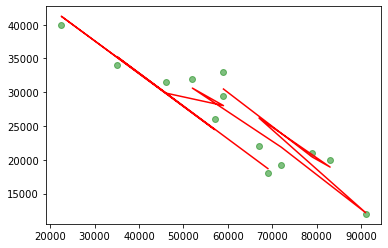

In [28]:
plt.scatter(x_['Mileage'],y_,c='g',alpha = .5)
plt.plot(x_['Mileage'],model.predict(x_),'r')


#  OneHotIncoder and LabelEncoder

### Could not understand OneHotEncoding Properly

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe = LabelEncoder()

dataEncode = data

In [ ]:
data['Car Model'] = lbe.fit_transform(data['Car Model'])

In [ ]:
dataEncode

In [ ]:
X_ = dataEncode[['Car Model','Mileage','Age(yrs)']].values

In [ ]:
X_

In [ ]:
Y_ = dataEncode[['Sell Price($)']].values
Y_

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
ohe = OneHotEncoder(categorical_features = X_[0], sparse=False)
# sparse=True

In [ ]:
X_ = ohe.fit_transform(X['Car Model'])

In [ ]:
X_

In [ ]:
X_ = X_[:,1:]
X_

In [ ]:
from sklearn.linear_model  import LinearRegression
mdl = LinearRegression()

In [ ]:
mdl.fit(X_,Y_)

In [ ]:
mdl.predict([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.,1,0,69,6]])

In [29]:
# The Avobe Code of OneHotEncodi

In [30]:
import joblib

In [32]:
mdl = joblib.load('./../LogesticRegression/hr_analysis_joblib_model')

In [33]:
mdl.predict([[0.38,157,0,0,1]])

array([0], dtype=int64)